In [3]:
import argparse
import pickle
import gym
import time
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from run_test import *
import atari_head_dataset as ahd 
import utils
import cv2

Logging to /tmp/openai-2019-05-07-16-58-04-221996


In [4]:
def unnormalize_state(obs):
    obs = obs * 255.0
    return obs.astype('uint8')

In [5]:
if __name__=="__main__":
    env_name = "breakout"
    data_dir = "../data/atari-head/"
    dataset = ahd.AtariHeadDataset(env_name, data_dir)
    

env name:  breakout
valid trials: ['218_RZ_7584753_Jan-15-14-40-41', '205_RZ_4137619_Dec-06-17-09-10', '198_RZ_3877709_Dec-03-16-56-11']
valid trial nums: [218, 205, 198]
1
205 [218, 205, 198]
randomly sampling a trial number for extra episodes in a trajectory
1
198 [218, 205, 198]
randomly sampling a trial number for extra episodes in a trajectory


In [7]:
    print(len(dataset.trajectories['breakout'][218]))
    demonstrations, learning_returns, learning_rewards, learning_gaze, _ = utils.get_preprocessed_trajectories(env_name, dataset, data_dir)

13702
traj length:  5
Max human score 554
Min human score 2
num non duplicate scores 5
len demos:  5
89 89 89


In [17]:
    print(len(learning_gaze))
    print(len(demonstrations))
    #print(learning_rewards)
    print((learning_gaze[0][0])) # gaze for first frame of first trajectory
    print(demonstrations[0][0].shape)
    print(learning_gaze[0][0].shape)

5
5
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
(1, 84, 84, 4)
(1, 84, 84)


In [12]:
    from PIL import Image
    data = demonstrations[0][0].squeeze()
    print(data.shape)
    print(len(learning_gaze[0][0]))
    data = data[:,:,2]
    data = unnormalize_state(data)
    img = Image.fromarray(data)
    basewidth = 600
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    img.show()

(84, 84, 4)
1


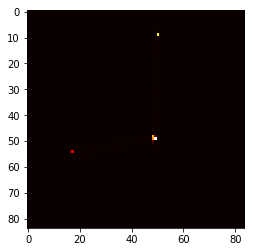

4.246753246753245
1.0
0.0


In [32]:
    import matplotlib.pyplot as plt
    import seaborn as sns
    gaze_map = learning_gaze[0][0].squeeze()
    plt.imshow(gaze_map, cmap='hot', interpolation='nearest')
    #ax = sns.heatmap(gaze_map, linewidth=0.5, cmap="YlGnBu")
    plt.show()
    print(sum(sum(learning_gaze[0][0].squeeze())))
    print(np.amax(learning_gaze[0][0]))
    print(np.amin(learning_gaze[0][0]))

In [30]:
    # overlay heatmap on image frames
    
   

In [33]:
    # visualize output of 4th conv layer

In [ ]:
    # overlay conv layer output on image frames